# Time Series Forecasting

We are installing packages 

In [1]:
pip install sklearn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install statsmodels

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pandas

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install cryptocompare

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install skforecast

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


We are importing different packages 

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
import cryptocompare
import datetime
import numpy as np
import statsmodels
import sklearn
from pandas import DataFrame as df

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split, cross_val_score
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn import model_selection
from sklearn.linear_model import RidgeCV, LassoCV,ElasticNetCV
from statsmodels.tsa.stattools import adfuller



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/statsmodels/compat/pandas.py:61: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


# First stage

We are getting the api key from crypto compare. We have decided to gather historical data from Ethereum. We have decided on this asset because it is one of the biggest cryptocurrencies out there, whit the second highest market cap. Experts also anticipate that this cryptocurrencie will have one of the largest growth rates out of all the cryptocurrencies in the coming years.

Ethereum is affected by market supply and demand for cryptocurrency. Markets for cryptocurrencies feature order books with buy and sell orders, just like stock exchanges do. The price of Ethereum will rise as demand rises, while the price will fall as sell order supply rises.

The collapse of the cryptocurrency market is to blame for Ethereum's recent decline. But there are also additional reasons why it is dwindling more quickly. Another factor is the delayed uptake of the Ethereum blockchain. Ethereum is losing users because of its high gas fee and slow chain.

The Eth1/Eth2 upgrades, which are scheduled for Berlin (April), Altair (June), London (July), and Shanghai (the second part of 2021), as well as capacity expansion and sharding, are among the significant Ethereum events that happend in 2021.

We should be able to obtain the historical data for Ethereum through an API key. We cannot obtain variables for other applications on Ethereum like NFTs and DeFi, to see how they affect the price.

# Second stage

In [8]:
cryptocompare.cryptocompare._set_api_key_parameter('49a839b5b7395a830c0a3a61819d8a657950ef22ae68d5e6c1364ccc60117584')

'&api_key=49a839b5b7395a830c0a3a61819d8a657950ef22ae68d5e6c1364ccc60117584'

In [9]:
ETHy = cryptocompare.get_historical_price_day('ETH', 'EUR', limit=100, exchange='CCCAGG', toTs=datetime.datetime(2022,6,6))
ETHy

[{'time': 1645747200,
  'high': 2515.73,
  'low': 2303.09,
  'open': 2319.69,
  'volumefrom': 74295.57,
  'volumeto': 177572421.41,
  'close': 2456.33,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1645833600,
  'high': 2502.79,
  'low': 2449.66,
  'open': 2457.35,
  'volumefrom': 114359.28,
  'volumeto': 282246374.13,
  'close': 2468.07,
  'conversionType': 'multiply',
  'conversionSymbol': 'BTC'},
 {'time': 1645920000,
  'high': 2516.53,
  'low': 2295.23,
  'open': 2467.68,
  'volumefrom': 94262.88,
  'volumeto': 226069464.41,
  'close': 2341.5,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1646006400,
  'high': 2621.38,
  'low': 2305.96,
  'open': 2341.5,
  'volumefrom': 100133.52,
  'volumeto': 243933141.76,
  'close': 2606.4,
  'conversionType': 'direct',
  'conversionSymbol': ''},
 {'time': 1646092800,
  'high': 2723.9,
  'low': 2557.71,
  'open': 2606.4,
  'volumefrom': 91898.1,
  'volumeto': 242624719.51,
  'close': 2673.69,
  'conversi

In [10]:
eth = pd.DataFrame(ETHy)

In [11]:
eth["Date"] = pd.to_datetime(eth["time"], unit = "s")

In [12]:
eth = eth.set_index('Date')

In [13]:
eth.head()

,time,high,low,open,volumefrom,volumeto,close,conversionType,conversionSymbol
Date,,,,,,,,,
2022-02-25,1645747200,2515.73,2303.09,2319.69,74295.57,1.775724e+08,2456.33,direct,
2022-02-26,1645833600,2502.79,2449.66,2457.35,114359.28,2.822464e+08,2468.07,multiply,BTC
2022-02-27,1645920000,2516.53,2295.23,2467.68,94262.88,2.260695e+08,2341.50,direct,
2022-02-28,1646006400,2621.38,2305.96,2341.50,100133.52,2.439331e+08,2606.40,direct,
2022-03-01,1646092800,2723.90,2557.71,2606.40,91898.10,2.426247e+08,2673.69,direct,


We use these function to check that we donst have any na values

In [14]:
eth.isnull().sum()

time                0
high                0
low                 0
open                0
volumefrom          0
volumeto            0
close               0
conversionType      0
conversionSymbol    0
dtype: int64

In [15]:
eth.isnull().any()

time                False
high                False
low                 False
open                False
volumefrom          False
volumeto            False
close               False
conversionType      False
conversionSymbol    False
dtype: bool

We plot the graf

<AxesSubplot:xlabel='Date'>

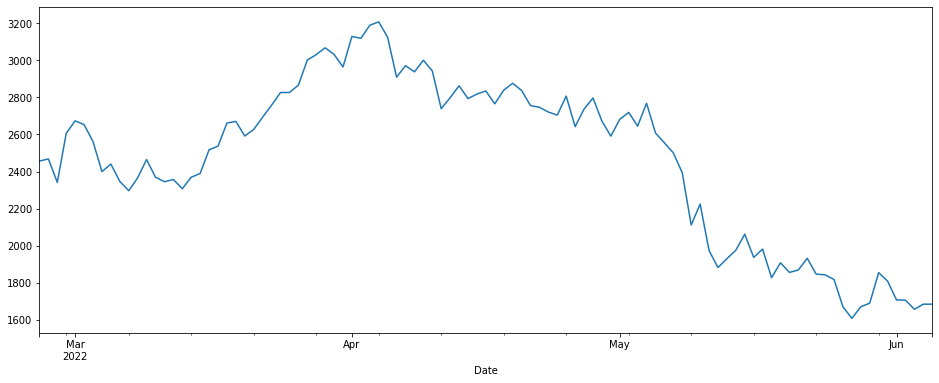

In [16]:
eth['close'].plot(figsize=(16,6))

We plot to see how many aoutcorrelations there are

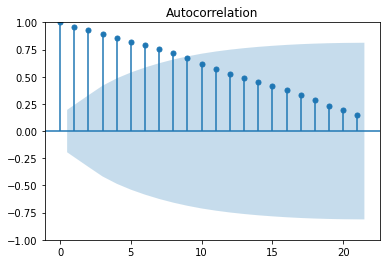

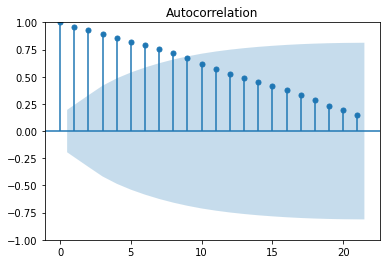

In [18]:
plot_acf(eth["close"])

In [19]:
def ADF_test(timeseries, dataDesc):
    print(' > Is the {} stationary ?'.format(dataDesc))
    dftest = adfuller(timeseries.dropna(), autolag='AIC')
    print('Test statistic = {:.3f}'.format(dftest[0]))
    print('P-value = {:.3f}'.format(dftest[1]))
    print('Critical values :')
    for k, v in dftest[4].items():
        print('\t{}: {} - The data is {} stationary with {}% confidence'.format(k, v, 'not' if v<dftest[0] else '', 100-int(k[:-1])))

In [20]:
ADF_test(eth["close"],'raw data')

 > Is the raw data stationary ?
Test statistic = -0.309
P-value = 0.924
Critical values :
	1%: -3.497501033 - The data is not stationary with 99% confidence
	5%: -2.89090644 - The data is not stationary with 95% confidence
	10%: -2.5824349 - The data is not stationary with 90% confidence


We can se that the data is not stationary, so we have to make it stationsry 

# Augmented Dickey-Fuller Test

In [21]:
daily_return = eth['close'].pct_change(1)

In [22]:
ADF_test(eth["close"],'raw data')

 > Is the raw data stationary ?
Test statistic = -0.309
P-value = 0.924
Critical values :
	1%: -3.497501033 - The data is not stationary with 99% confidence
	5%: -2.89090644 - The data is not stationary with 95% confidence
	10%: -2.5824349 - The data is not stationary with 90% confidence


We have now made it stationary

In [29]:
ADF_test(daily_return,'raw data')

 > Is the raw data stationary ?
Test statistic = -11.146
P-value = 0.000
Critical values :
	1%: -3.498198082189098 - The data is  stationary with 99% confidence
	5%: -2.891208211860468 - The data is  stationary with 95% confidence
	10%: -2.5825959973472097 - The data is  stationary with 90% confidence


Plot the Change

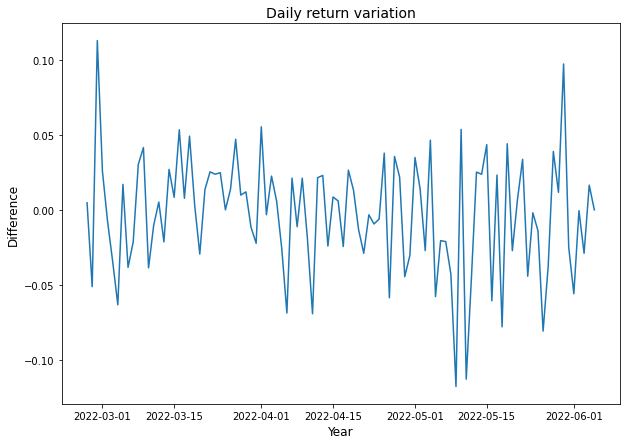

In [23]:
plt.figure(figsize=(10, 7))
plt.plot(daily_return)
plt.title('Daily return variation', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Difference', fontsize=12)
plt.show()

In [24]:
eth['Difference'] = eth['close'].diff()

In [25]:
y = eth["Difference"]

In [26]:
y = eth.dropna()["Difference"]

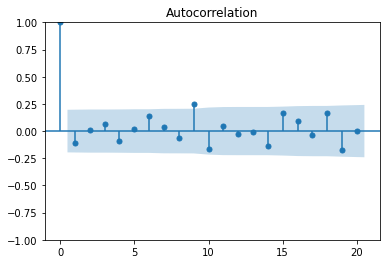

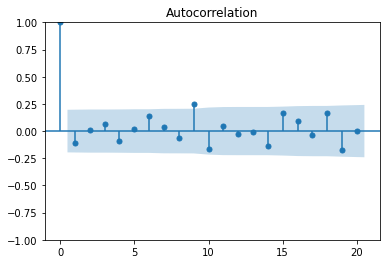

In [27]:
plot_acf(y)

In [28]:
print(y)

Date
2022-02-26     11.74
2022-02-27   -126.57
2022-02-28    264.90
2022-03-01     67.29
2022-03-02    -20.42
               ...  
2022-06-01   -101.24
2022-06-02     -0.87
2022-06-03    -49.45
2022-06-04     27.42
2022-06-05      0.07
Name: Difference, Length: 100, dtype: float64


since we need more then 10 variables we are creating 11 lags in a loop. We could have picked 11, 15, 16 or 18 as we can se from the graf

In [29]:
lags = pd.DataFrame()
for i in range(11,0,-1):
            lags['t-'+str(i)] = y.shift(i)
            lags['t'] =  y

We are dropping na values 

In [30]:
lags = lags.dropna()

In [31]:
X = lags.loc[:, lags.columns != 't']
Y = lags.iloc[:, 1]
print(X)

              t-11    t-10     t-9     t-8     t-7     t-6     t-5     t-4  \
Date                                                                         
2022-03-09   11.74 -126.57  264.90   67.29  -20.42  -91.57 -162.33   40.92   
2022-03-10 -126.57  264.90   67.29  -20.42  -91.57 -162.33   40.92  -93.63   
2022-03-11  264.90   67.29  -20.42  -91.57 -162.33   40.92  -93.63  -50.49   
2022-03-12   67.29  -20.42  -91.57 -162.33   40.92  -93.63  -50.49   69.86   
2022-03-13  -20.42  -91.57 -162.33   40.92  -93.63  -50.49   69.86   98.57   
...            ...     ...     ...     ...     ...     ...     ...     ...   
2022-06-01   12.84   63.21  -85.59   -3.51  -25.70 -147.09  -62.47   62.72   
2022-06-02   63.21  -85.59   -3.51  -25.70 -147.09  -62.47   62.72   19.66   
2022-06-03  -85.59   -3.51  -25.70 -147.09  -62.47   62.72   19.66  164.73   
2022-06-04   -3.51  -25.70 -147.09  -62.47   62.72   19.66  164.73  -46.34   
2022-06-05  -25.70 -147.09  -62.47   62.72   19.66  164.73  -46.

We are training variables 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    random_state=40
)

Dropping NA values 

In [33]:
daily_return = daily_return.dropna()

We are plotting the graf

We have deiced to have 30 steps, which is how many days back we are taking data to forcast future data

Train dates : 2022-02-26 00:00:00 --- 2022-05-06 00:00:00  (n=70)
Test dates  : 2022-05-07 00:00:00 --- 2022-06-05 00:00:00  (n=30)


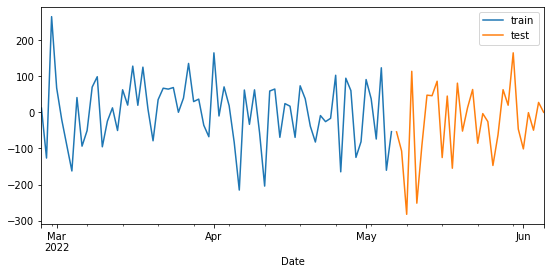

In [34]:
steps = 30
data_train = y[:-steps]
data_test  = y[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

fig, ax=plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test.plot(ax=ax, label='test')
ax.legend();

Using Elastic net as the regressor

In [35]:
forecaster = ForecasterAutoreg(
                regressor = ElasticNet(alpha = 0.5, l1_ratio = 1),
                lags      = 11
             )
forecaster.fit(y = y)
forecaster

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skforecast/utils/utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/skforecast/utils/utils.py:246: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: ElasticNet(alpha=0.5, l1_ratio=1) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11] 
Window size: 11 
Included exogenous: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 99] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'alpha': 0.5, 'copy_X': True, 'fit_intercept': True, 'l1_ratio': 1, 'max_iter': 1000, 'normalize': 'deprecated', 'positive': False, 'precompute': False, 'random_state': None, 'selection': 'cyclic', 'tol': 0.0001, 'warm_start': False} 
Creation date: 2022-08-04 21:24:57 
Last fit date: 2022-08-04 21:24:57 
Skforecast version: 0.4.3 

We are making predictions 

In [36]:
steps = 30
predictions = forecaster.predict(steps=steps)
predictions.head(5)

100    10.089954
101   -45.968696
102    30.200671
103   -36.147169
104   -15.791406
Name: pred, dtype: float64

In [37]:
predictions = predictions.to_frame()

In [38]:
data_test = data_test.to_frame()

We are adding predictions to a dataframe

In [39]:
data_test['predictions'] = predictions['pred'].values

In [40]:
data_test

,Difference,predictions
Date,,
2022-05-07,-54.08,10.089954
2022-05-08,-107.19,-45.968696
2022-05-09,-282.34,30.200671
2022-05-10,113.54,-36.147169
2022-05-11,-251.49,-15.791406
2022-05-12,-91.34,14.873842
2022-05-13,47.54,-25.054384
2022-05-14,46.01,2.639780
2022-05-15,86.11,-8.814862


We are plotting the graf

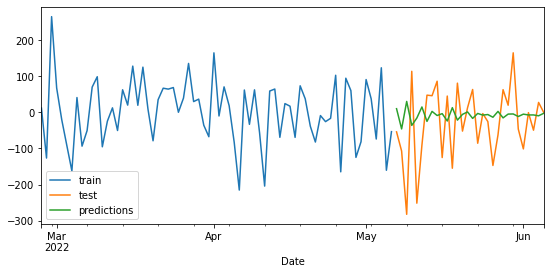

In [41]:
fig, ax = plt.subplots(figsize=(9, 4))
data_train.plot(ax=ax, label='train')
data_test['Difference'].plot(ax=ax, label='test')
data_test['predictions'].plot(ax=ax, label='predictions')
ax.legend();

We are testing the error

In [42]:
error_mse = mean_squared_error(
                y_true = data_test['Difference'],
                y_pred = predictions
            )

print(f"Test error (mse): {error_mse}")

Test error (mse): 11868.240642807707


The mse score is qite high

This can be due to the fact that we deindt implement anny external variables